The GaussianProcesses.jl package is not available in the Julia repository for this version of Julia. It can be installed via github. 

using Pkg
Pkg.add(url="https://github.com/STOR-i/GaussianProcesses.jl")

In [3]:
using GaussianProcesses
using Plots

# Data Preparation

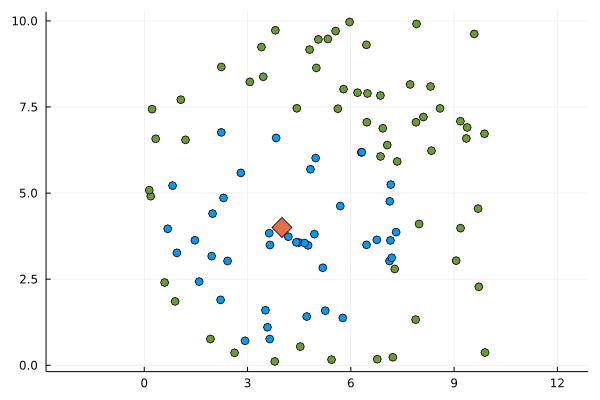

In [4]:
n_data = 100
dim = 2
cent_1 = [4;4] # column matrix
rad_sq = 12
x = rand(n_data, dim)*10

z = x .- cent_1'
class_1 = map(z -> z ? 1 : 0, sum(z .^ 2, dims = 2) .< rad_sq);

p = scatter(x[:, 1], x[:, 2], m=:o, labels=false, color = class_1)
scatter!(p, [cent_1[1]], [cent_1[2]], m=:d, ms = 10, labels = false, aspect_ratio=:equal)

## 3D surface plot

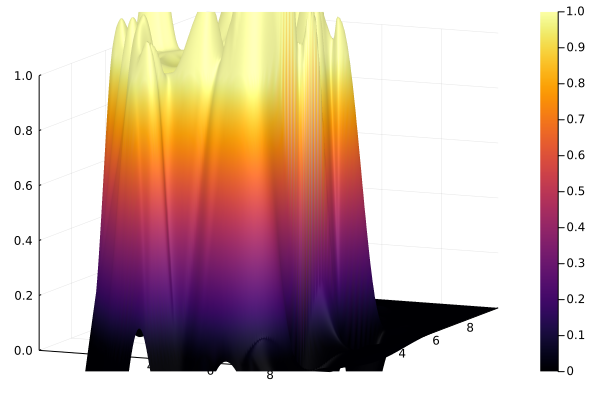

In [7]:
surface(x[:,1], x[:, 2], [class_1[i] for i in 1:length(class_1)])

## Gaussian Process

In [8]:
mZero = MeanZero();                # Zero mean function
kern = GaussianProcesses.SE(0.0, 0.0)
# kern = Matern(3/2,zeros(5),0.0);   # Matern 3/2 ARD kernel (note that hyperparameters are on the log scale)
lik = BernLik();                   # Bernoulli likelihood for binary data {0,1}

In [10]:
y = [class_1[i] for i in 1:length(class_1)];

In [11]:
gp = GP(Matrix(transpose(x)),y,mZero,kern)

GP Exact object:
  Dim = 2
  Number of observations = 100
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[4.758443384992823 3.6454657960119405 … 4.658684608168471 9.584292104799456; 3.4823344205903393 0.760722491032404 … 3.5482195804984173 9.62201448919918]
  Output observations = [1, 1, 0, 0, 0, 0, 0, 0, 0, 1  …  1, 1, 0, 0, 0, 0, 0, 1, 1, 0]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -45.99

In [12]:
optimize!(gp)

 * Status: success

 * Candidate solution
    Final objective value:     2.485062e+01

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.28e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 8.52e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.84e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.14e-15 ≰ 0.0e+00
    |g(x)|                 = 2.24e-12 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    11
    f(x) calls:    31
    ∇f(x) calls:   31


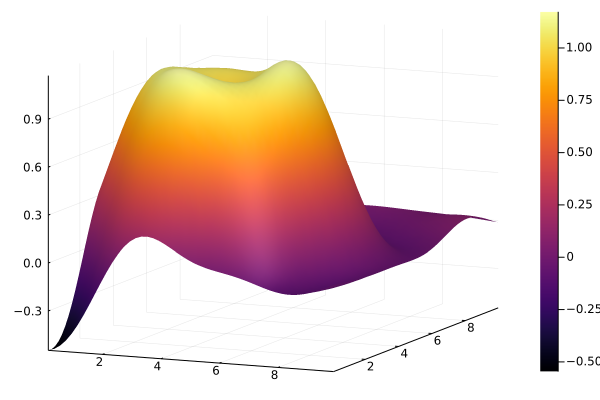

In [24]:
surface(gp)

**Questions**

1. How it works for 19 input variables?
2. How to extract the Y values generated by the GP object?